In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
df=pd.read_csv('cleaned_data.csv')

/home/devansh/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
gk=df.groupby('RIC')

In [5]:
l=df.RIC.unique()
len(l)

87

In [6]:
df=df.sort_values(['RIC','date'])
df_r=pd.DataFrame(columns=['RIC', 'Start', 'Finish'])

In [133]:
for i in l:
    df_t=gk.get_group(i)
    maxd=df_t['date'].max()
    mind=df_t['date'].min()
    df_r = df_r.append({'RIC':i, 'Start': maxd, 'Finish': mind}, ignore_index=True)
    

In [134]:
df_r

RIC       Start      Finish
0   10TBc1  2019-07-01  2008-02-20
1     ADc1  2019-07-01  1996-01-01
2    AEXc1  2019-07-01  1996-01-01
3    BAXc1  2019-06-17  1996-01-01
4     BOc1  2019-07-01  1996-01-01
..     ...         ...         ...
82     Wc1  2019-07-01  1996-01-01
83   YAPc1  2019-07-01  2000-05-01
84   YBAc1  2019-07-01  1996-01-01
85    YOc1  2019-06-06  2007-01-08
86   YTCc1  2019-07-01  1996-01-01

[87 rows x 3 columns]

In [135]:
df_r.to_csv('Start_FInish_RIC.CSV')

In [7]:
df['Asset Class'].value_counts()

Commodities     112457
Fixed Income     91456
Equity           74810
FX               48860
Name: Asset Class, dtype: int64

In [8]:
df

Open Price  Close Price  High Price  Low Price  Accumulated Volume  \
0              NaN     0.000000         NaN        NaN                 NaN   
1         0.000000     0.000000    0.000000   0.000000                 0.0   
2         0.000000     0.000000    0.000000   0.000000                 0.0   
3         0.097096     0.095154    0.097096   0.095154                55.0   
4         0.095471     0.095432    0.095471   0.095134                30.0   
...            ...          ...         ...        ...                 ...   
328982   68.658689    68.672603   68.689996  68.655211            209488.0   
328983   68.929158    68.936140   68.946615  68.922175            135107.0   
328984   69.179503    69.133951   69.179503  69.116431            191402.0   
328985   69.248859    69.269919   69.276939  69.241839            138249.0   
328986   68.720181    68.702769   68.723664  68.685356            189320.0   

        Open Interest    Return     RIC   Asset Class      Name  \
0                 NaN       NaN  10TBc1  Fixed Income    KR10YR   
1                 0.0       NaN  10TBc1  Fixed Income    KR10YR   
2                 0.0       NaN  10TBc1  Fixed Income    KR10YR   
3               942.0       inf  10TBc1  Fixed Income    KR10YR   
4               942.0  0.002916  10TBc1  Fixed Income    KR10YR   
...               ...       ...     ...           ...       ...   
328982      1320642.0 -0.000419   YTCc1  Fixed Income  10YR Aus   
328983      1302979.0  0.003838   YTCc1  Fixed Income  10YR Aus   
328984      1316692.0  0.002869   YTCc1  Fixed Income  10YR Aus   
328985      1303702.0  0.001967   YTCc1  Fixed Income  10YR Aus   
328986      1325559.0 -0.008188   YTCc1  Fixed Income  10YR Aus   

       Exchange Country                      Exchange  ChainRIC Spot RIC12  \
0                 Korea                            KFE  0#10TB:  NaN   NaN   
1                 Korea                            KFE  0#10TB:  NaN   NaN   
2                 Korea                            KFE  0#10TB:  NaN   NaN   
3                 Korea                            KFE  0#10TB:  NaN   NaN   
4                 Korea                            KFE  0#10TB:  NaN   NaN   
...                 ...                            ...      ...  ...   ...   
328982        Australia  Australian Stock Exchange Ltd   0#YTC:  NaN   NaN   
328983        Australia  Australian Stock Exchange Ltd   0#YTC:  NaN   NaN   
328984        Australia  Australian Stock Exchange Ltd   0#YTC:  NaN   NaN   
328985        Australia  Australian Stock Exchange Ltd   0#YTC:  NaN   NaN   
328986        Australia  Australian Stock Exchange Ltd   0#YTC:  NaN   NaN   

              date  
0       2008-02-20  
1       2008-02-21  
2       2008-02-22  
3       2008-03-19  
4       2008-03-20  
...            ...  
328982  2019-06-25  
328983  2019-06-26  
328984  2019-06-27  
328985  2019-06-28  
328986  2019-07-01  

[328987 rows x 16 columns]

In [9]:
df=df.rename(columns={"Close Price": "p"})

In [10]:
df=df.rename(columns={"Accumulated Volume": "v"})

In [11]:
df=df.rename(columns={"Exchange Country": "cont"})

In [12]:
df=df.rename(columns={"Exchange Country": "cont"})

In [13]:
df=df.drop(['ChainRIC','Spot','RIC12'],axis=1)

In [14]:
df=df.drop(['Low Price','High Price','Open Price'],axis=1)

In [15]:
df

p         v  Open Interest    Return     RIC   Asset Class  \
0        0.000000       NaN            NaN       NaN  10TBc1  Fixed Income   
1        0.000000       0.0            0.0       NaN  10TBc1  Fixed Income   
2        0.000000       0.0            0.0       NaN  10TBc1  Fixed Income   
3        0.095154      55.0          942.0       inf  10TBc1  Fixed Income   
4        0.095432      30.0          942.0  0.002916  10TBc1  Fixed Income   
...           ...       ...            ...       ...     ...           ...   
328982  68.672603  209488.0      1320642.0 -0.000419   YTCc1  Fixed Income   
328983  68.936140  135107.0      1302979.0  0.003838   YTCc1  Fixed Income   
328984  69.133951  191402.0      1316692.0  0.002869   YTCc1  Fixed Income   
328985  69.269919  138249.0      1303702.0  0.001967   YTCc1  Fixed Income   
328986  68.702769  189320.0      1325559.0 -0.008188   YTCc1  Fixed Income   

            Name       cont                      Exchange         date  
0         KR10YR      Korea                            KFE  2008-02-20  
1         KR10YR      Korea                            KFE  2008-02-21  
2         KR10YR      Korea                            KFE  2008-02-22  
3         KR10YR      Korea                            KFE  2008-03-19  
4         KR10YR      Korea                            KFE  2008-03-20  
...          ...        ...                            ...         ...  
328982  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-06-25  
328983  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-06-26  
328984  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-06-27  
328985  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-06-28  
328986  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-07-01  

[328987 rows x 10 columns]

In [16]:
df['Asset Class'].value_counts()

Commodities     112457
Fixed Income     91456
Equity           74810
FX               48860
Name: Asset Class, dtype: int64

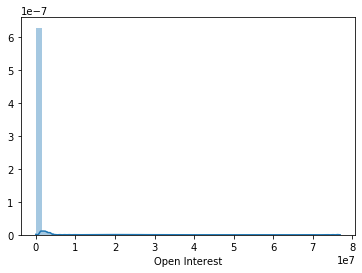

In [17]:
sb.distplot(df['Open Interest'].dropna())

In [135]:
len(df)/(18*17*18)

59.728939724037765

In [132]:
5483**0.333333333333

17.63353626364443

In [19]:
df['p_cut'] = pd.qcut(df['p'],q=10,labels=False)

In [171]:
df.groupby('p_cut').count()

p      v  Open Interest  Return    RIC  Asset Class   Name   cont  \
p_cut                                                                          
0      32900  32845          32862   32832  32900        32900  32900  32900   
1      32900  32871          32877   32864  32900        32900  32900  32900   
2      32898  32808          32646   32854  32898        32898  32898  32898   
3      32902  32863          32834   32870  32902        32902  32902  32902   
4      32894  32841          32825   32844  32894        32894  32894  32894   
5      32898  32793          32801   32860  32898        32898  32898  32898   
6      32899  32853          32810   32859  32899        32899  32899  32899   
7      32902  32813          32700   32840  32902        32902  32902  32902   
8      32895  32849          32676   32840  32895        32895  32895  32895   
9      32899  31408          31349   32863  32899        32899  31495  32899   

       Exchange    date  p_cut5  v_cut  oi_cut  oi_cut5  Bucket  Bucket5  
p_cut                                                                     
0          32900  32900   32900  32900   32900    32900   32900    32900  
1          32900  32900   32900  32900   32900    32900   32900    32900  
2          32898  32898   32898  32898   32898    32898   32898    32898  
3          32902  32902   32902  32902   32902    32902   32902    32902  
4          32894  32894   32894  32894   32894    32894   32894    32894  
5          32898  32898   32898  32898   32898    32898   32898    32898  
6          32899  32899   32899  32899   32899    32899   32899    32899  
7          32902  32902   32902  32902   32902    32902   32902    32902  
8          32895  32895   32895  32895   32895    32895   32895    32895  
9          31495  32899   32899  32899   32899    32899   32899    32899

In [66]:
df

p         v  Open Interest    Return     RIC   Asset Class  \
0        0.000000       NaN            NaN       NaN  10TBc1  Fixed Income   
1        0.000000       0.0            0.0       NaN  10TBc1  Fixed Income   
2        0.000000       0.0            0.0       NaN  10TBc1  Fixed Income   
3        0.095154      55.0          942.0       inf  10TBc1  Fixed Income   
4        0.095432      30.0          942.0  0.002916  10TBc1  Fixed Income   
...           ...       ...            ...       ...     ...           ...   
328982  68.672603  209488.0      1320642.0 -0.000419   YTCc1  Fixed Income   
328983  68.936140  135107.0      1302979.0  0.003838   YTCc1  Fixed Income   
328984  69.133951  191402.0      1316692.0  0.002869   YTCc1  Fixed Income   
328985  69.269919  138249.0      1303702.0  0.001967   YTCc1  Fixed Income   
328986  68.702769  189320.0      1325559.0 -0.008188   YTCc1  Fixed Income   

            Name       cont                      Exchange         date  p_cut  
0         KR10YR      Korea                            KFE  2008-02-20      0  
1         KR10YR      Korea                            KFE  2008-02-21      0  
2         KR10YR      Korea                            KFE  2008-02-22      0  
3         KR10YR      Korea                            KFE  2008-03-19      0  
4         KR10YR      Korea                            KFE  2008-03-20      0  
...          ...        ...                            ...         ...    ...  
328982  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-06-25      4  
328983  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-06-26      4  
328984  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-06-27      4  
328985  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-06-28      4  
328986  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-07-01      4  

[328987 rows x 11 columns]

In [23]:
#df['p_cut5'] = pd.qcut(df['p'],q=5,labels=False)
#df['v_cut'] = pd.qcut(df['v'],q=5,labels=False)
#df['oi_cut'] = pd.qcut(df['Open Interest'],q=10,labels=False)

In [24]:
df['oi_cut5'] = pd.qcut(df['Open Interest'],q=5,labels=False)

In [172]:
df.groupby('oi_cut').count()

p      v  Open Interest  Return    RIC  Asset Class   Name   cont  \
oi_cut                                                                          
0.0     32638  32527          32638   32555  32638        32638  32638  32638   
1.0     32641  32609          32641   32608  32641        32641  32641  32641   
2.0     32635  32621          32635   32602  32635        32635  32635  32635   
3.0     32639  32617          32639   32623  32639        32639  32639  32639   
4.0     32637  32629          32637   32629  32637        32637  32637  32637   
5.0     32641  32609          32641   32622  32641        32641  32641  32641   
6.0     32635  32619          32635   32612  32635        32635  32635  32635   
7.0     32638  32607          32638   32612  32638        32638  32638  32638   
8.0     32638  32629          32638   32621  32638        32638  32638  32638   
9.0     32638  32636          32638   32622  32638        32638  32638  32638   
10.0     2607    841              0    2420   2607         2607   1203   2607   

        Exchange    date  p_cut  p_cut5  v_cut  oi_cut5  Bucket  Bucket5  
oi_cut                                                                    
0.0         32638  32638  32638   32638  32638    32638   32638    32638  
1.0         32641  32641  32641   32641  32641    32641   32641    32641  
2.0         32635  32635  32635   32635  32635    32635   32635    32635  
3.0         32639  32639  32639   32639  32639    32639   32639    32639  
4.0         32637  32637  32637   32637  32637    32637   32637    32637  
5.0         32641  32641  32641   32641  32641    32641   32641    32641  
6.0         32635  32635  32635   32635  32635    32635   32635    32635  
7.0         32638  32638  32638   32638  32638    32638   32638    32638  
8.0         32638  32638  32638   32638  32638    32638   32638    32638  
9.0         32638  32638  32638   32638  32638    32638   32638    32638  
10.0         1203   2607   2607    2607   2607     2607    2607     2607

In [78]:
df

p         v  Open Interest    Return     RIC   Asset Class  \
0        0.000000       NaN            NaN       NaN  10TBc1  Fixed Income   
1        0.000000       0.0            0.0       NaN  10TBc1  Fixed Income   
2        0.000000       0.0            0.0       NaN  10TBc1  Fixed Income   
3        0.095154      55.0          942.0       inf  10TBc1  Fixed Income   
4        0.095432      30.0          942.0  0.002916  10TBc1  Fixed Income   
...           ...       ...            ...       ...     ...           ...   
328982  68.672603  209488.0      1320642.0 -0.000419   YTCc1  Fixed Income   
328983  68.936140  135107.0      1302979.0  0.003838   YTCc1  Fixed Income   
328984  69.133951  191402.0      1316692.0  0.002869   YTCc1  Fixed Income   
328985  69.269919  138249.0      1303702.0  0.001967   YTCc1  Fixed Income   
328986  68.702769  189320.0      1325559.0 -0.008188   YTCc1  Fixed Income   

            Name       cont                      Exchange         date  p_cut  \
0         KR10YR      Korea                            KFE  2008-02-20      0   
1         KR10YR      Korea                            KFE  2008-02-21      0   
2         KR10YR      Korea                            KFE  2008-02-22      0   
3         KR10YR      Korea                            KFE  2008-03-19      0   
4         KR10YR      Korea                            KFE  2008-03-20      0   
...          ...        ...                            ...         ...    ...   
328982  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-06-25      4   
328983  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-06-26      4   
328984  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-06-27      4   
328985  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-06-28      4   
328986  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-07-01      4   

        p_cut5  v_cut  oi_cut  oi_cut5  
0            0      0     NaN      NaN  
1            0      0     0.0      0.0  
2            0      0     0.0      0.0  
3            0      0     1.0      0.0  
4            0      0     1.0      0.0  
...        ...    ...     ...      ...  
328982       2      4     9.0      4.0  
328983       2      4     9.0      4.0  
328984       2      4     9.0      4.0  
328985       2      4     9.0      4.0  
328986       2      4     9.0      4.0  

[328987 rows x 15 columns]

In [175]:
df['Name'].value_counts()


Brent Crude Oil                                        6013
STIR EURIBOR 3M                                        5999
10YR Aus                                               5996
STIR 90D Bank Bills                                    5995
AEX Index                                              5992
                                                       ... 
Eurex MSCI Philippines Index Future Chain Contracts     331
HUF                                                     276
Eurex MSCI Mexico Index Future Chain Contracts          276
CZK                                                     224
Eurex MSCI UK Index Future Chain Contracts               73
Name: Name, Length: 86, dtype: int64

In [157]:
#df.at[0,'oi_cut'].isna()
#df.loc[df['First Season'] > 1990, 'First Season'] = 1
pd.isna(df.at[0,'oi_cut'])

False

In [53]:
df.loc[pd.isna(df['oi_cut']),'oi_cut']=10
df.loc[pd.isna(df['oi_cut5']),'oi_cut5']=5
df.loc[pd.isna(df['p_cut']),'p_cut']=10
df.loc[pd.isna(df['p_cut5']),'p_cut5']=5
df.loc[pd.isna(df['v_cut']),'v_cut']=5
df.loc[pd.isna(df['cont']),'cont']=0
df.loc[pd.isna(df['Asset Class']),'Asset Class']=0


In [155]:
df

p         v  Open Interest    Return     RIC   Asset Class  \
0        0.000000       NaN            NaN       NaN  10TBc1  Fixed Income   
1        0.000000       0.0            0.0       NaN  10TBc1  Fixed Income   
2        0.000000       0.0            0.0       NaN  10TBc1  Fixed Income   
3        0.095154      55.0          942.0       inf  10TBc1  Fixed Income   
4        0.095432      30.0          942.0  0.002916  10TBc1  Fixed Income   
...           ...       ...            ...       ...     ...           ...   
328982  68.672603  209488.0      1320642.0 -0.000419   YTCc1  Fixed Income   
328983  68.936140  135107.0      1302979.0  0.003838   YTCc1  Fixed Income   
328984  69.133951  191402.0      1316692.0  0.002869   YTCc1  Fixed Income   
328985  69.269919  138249.0      1303702.0  0.001967   YTCc1  Fixed Income   
328986  68.702769  189320.0      1325559.0 -0.008188   YTCc1  Fixed Income   

            Name       cont                      Exchange         date  p_cut  \
0         KR10YR      Korea                            KFE  2008-02-20      0   
1         KR10YR      Korea                            KFE  2008-02-21      0   
2         KR10YR      Korea                            KFE  2008-02-22      0   
3         KR10YR      Korea                            KFE  2008-03-19      0   
4         KR10YR      Korea                            KFE  2008-03-20      0   
...          ...        ...                            ...         ...    ...   
328982  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-06-25      4   
328983  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-06-26      4   
328984  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-06-27      4   
328985  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-06-28      4   
328986  10YR Aus  Australia  Australian Stock Exchange Ltd  2019-07-01      4   

        p_cut5  v_cut  oi_cut  oi_cut5  
0            0    5.0    10.0      5.0  
1            0    0.0     0.0      0.0  
2            0    0.0     0.0      0.0  
3            0    0.0     1.0      0.0  
4            0    0.0     1.0      0.0  
...        ...    ...     ...      ...  
328982       2    4.0     9.0      4.0  
328983       2    4.0     9.0      4.0  
328984       2    4.0     9.0      4.0  
328985       2    4.0     9.0      4.0  
328986       2    4.0     9.0      4.0  

[328987 rows x 15 columns]

In [60]:
#df=df.drop(['Bucket'],axis=1)
df

p        v  Open Interest    Return    RIC  Asset Class  \
0          0.237200    772.0          739.0 -0.015768   BOc1  Commodities   
1          0.236800    330.0          573.0 -0.001686   BOc1  Commodities   
2          0.237800    597.0          256.0  0.004223   BOc1  Commodities   
3          0.236000    260.0           63.0 -0.007569   BOc1  Commodities   
4          0.235500    276.0           50.0 -0.002119   BOc1  Commodities   
...             ...      ...            ...       ...    ...          ...   
328982  9302.428929  62210.0       716324.0 -0.003981  FFIc1       Equity   
328983  9311.679249  50722.0       719042.0  0.000994  FFIc1       Equity   
328984  9298.434628  67578.0       720165.0 -0.001422  FFIc1       Equity   
328985  9355.325955  75716.0       720003.0  0.006118  FFIc1       Equity   
328986  9405.252382  91474.0       721477.0  0.005337  FFIc1       Equity   

                Name cont Exchange         date  p_cut  p_cut5  v_cut  oi_cut  \
0       Soybean Oil   USA     NYMEX  1996-01-16      0       0    1.0     0.0   
1       Soybean Oil   USA     NYMEX  1996-01-17      0       0    0.0     0.0   
2       Soybean Oil   USA     NYMEX  1996-01-18      0       0    0.0     0.0   
3       Soybean Oil   USA     NYMEX  1996-01-19      0       0    0.0     0.0   
4       Soybean Oil   USA     NYMEX  1996-01-22      0       0    0.0     0.0   
...              ...  ...       ...         ...    ...     ...    ...     ...   
328982          FTSE   UK     LIFFE  2019-06-25      9       4    3.0     9.0   
328983          FTSE   UK     LIFFE  2019-06-26      9       4    3.0     9.0   
328984          FTSE   UK     LIFFE  2019-06-27      9       4    3.0     9.0   
328985          FTSE   UK     LIFFE  2019-06-28      9       4    3.0     9.0   
328986          FTSE   UK     LIFFE  2019-07-01      9       4    4.0     9.0   

        oi_cut5  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
328982      4.0  
328983      4.0  
328984      4.0  
328985      4.0  
328986      4.0  

[328987 rows x 15 columns]

In [108]:
df['Bucket5']=df.apply(lambda row: str(row.p_cut5)+"::"+str(row.v_cut)+"::"+str(row['oi_cut5'])+"::"+str(row['Asset Class'])+"::"+str(row['cont']),axis=1)

In [109]:
#df2=df2.reset_index(drop=True).drop('Unnamed: 0',axis=1)
df2=df.sort_values(['Bucket5','date','RIC']).reset_index(drop=True)
df2['Asset Class'].isnull().value_counts()


False    328987
Name: Asset Class, dtype: int64

In [63]:
df2

p      v  Open Interest    Return   RIC  Asset Class  \
0           0.59950  529.0         2638.0 -0.000833  FCc1  Commodities   
1           0.60400  613.0         2374.0  0.007506  FCc1  Commodities   
2           0.59850  507.0         2123.0 -0.009106  FCc1  Commodities   
3           0.59675  500.0         2004.0 -0.002924  FCc1  Commodities   
4           0.59950  383.0         1845.0  0.004608  FCc1  Commodities   
...             ...    ...            ...       ...   ...          ...   
328982   2055.20000    NaN            NaN -0.008682  SPc1       Equity   
328983   2036.10000    NaN            NaN -0.009293  SPc1       Equity   
328984  18335.00000    NaN            NaN       NaN  NKc1       Equity   
328985   2009.50000    NaN            NaN       NaN  SPc1       Equity   
328986  21695.00000    NaN            NaN  0.015684  NKc1       Equity   

                  Name cont Exchange         date  p_cut  p_cut5  v_cut  \
0       Feeder Cattle   USA     NYMEX  1996-01-05      0       0    0.0   
1       Feeder Cattle   USA     NYMEX  1996-01-08      0       0    0.0   
2       Feeder Cattle   USA     NYMEX  1996-01-09      0       0    0.0   
3       Feeder Cattle   USA     NYMEX  1996-01-10      0       0    0.0   
4       Feeder Cattle   USA     NYMEX  1996-01-11      0       0    0.0   
...                ...  ...       ...         ...    ...     ...    ...   
328982         S&P 500  USA       CME  2015-12-30      8       4    5.0   
328983         S&P 500  USA       CME  2015-12-31      8       4    5.0   
328984       NIKKEI225  USA       CME  2016-01-01      9       4    5.0   
328985         S&P 500  USA       CME  2016-01-01      8       4    5.0   
328986       NIKKEI225  USA       CME  2019-07-01      9       4    5.0   

        oi_cut  oi_cut5                        Bucket5  
0          1.0      0.0  0::0.0::0.0::Commodities::USA  
1          1.0      0.0  0::0.0::0.0::Commodities::USA  
2          1.0      0.0  0::0.0::0.0::Commodities::USA  
3          1.0      0.0  0::0.0::0.0::Commodities::USA  
4          1.0      0.0  0::0.0::0.0::Commodities::USA  
...        ...      ...                            ...  
328982    10.0      5.0       4::5.0::5.0::Equity::USA  
328983    10.0      5.0       4::5.0::5.0::Equity::USA  
328984    10.0      5.0       4::5.0::5.0::Equity::USA  
328985    10.0      5.0       4::5.0::5.0::Equity::USA  
328986    10.0      5.0       4::5.0::5.0::Equity::USA  

[328987 rows x 16 columns]

In [103]:
df['Asset Class'].isnull().value_counts()

False    328987
Name: Asset Class, dtype: int64

In [66]:
df=df.drop('Bucket5',axis=1)

In [104]:
df['Bucket']=df.apply(lambda row: str(row.p_cut)+"::"+str(row['oi_cut'])+"::"+str(row['Asset Class'])+"::"+str(row['cont']),axis=1)

In [78]:
pd.set_option('display.max_rows', 5000)

In [112]:
df=df.sort_values(['Bucket','date','RIC'])
df=df.reset_index(drop=True)
df

p        v  Open Interest    Return    RIC  Asset Class  \
0          0.237200    772.0          739.0 -0.015768   BOc1  Commodities   
1          0.236800    330.0          573.0 -0.001686   BOc1  Commodities   
2          0.237800    597.0          256.0  0.004223   BOc1  Commodities   
3          0.236000    260.0           63.0 -0.007569   BOc1  Commodities   
4          0.235500    276.0           50.0 -0.002119   BOc1  Commodities   
...             ...      ...            ...       ...    ...          ...   
328982  9302.428929  62210.0       716324.0 -0.003981  FFIc1       Equity   
328983  9311.679249  50722.0       719042.0  0.000994  FFIc1       Equity   
328984  9298.434628  67578.0       720165.0 -0.001422  FFIc1       Equity   
328985  9355.325955  75716.0       720003.0  0.006118  FFIc1       Equity   
328986  9405.252382  91474.0       721477.0  0.005337  FFIc1       Equity   

                Name cont Exchange         date  p_cut  p_cut5  v_cut  oi_cut  \
0       Soybean Oil   USA     NYMEX  1996-01-16      0       0    1.0     0.0   
1       Soybean Oil   USA     NYMEX  1996-01-17      0       0    0.0     0.0   
2       Soybean Oil   USA     NYMEX  1996-01-18      0       0    0.0     0.0   
3       Soybean Oil   USA     NYMEX  1996-01-19      0       0    0.0     0.0   
4       Soybean Oil   USA     NYMEX  1996-01-22      0       0    0.0     0.0   
...              ...  ...       ...         ...    ...     ...    ...     ...   
328982          FTSE   UK     LIFFE  2019-06-25      9       4    3.0     9.0   
328983          FTSE   UK     LIFFE  2019-06-26      9       4    3.0     9.0   
328984          FTSE   UK     LIFFE  2019-06-27      9       4    3.0     9.0   
328985          FTSE   UK     LIFFE  2019-06-28      9       4    3.0     9.0   
328986          FTSE   UK     LIFFE  2019-07-01      9       4    4.0     9.0   

        oi_cut5                    Bucket                        Bucket5  
0           0.0  0::0.0::Commodities::USA  0::1.0::0.0::Commodities::USA  
1           0.0  0::0.0::Commodities::USA  0::0.0::0.0::Commodities::USA  
2           0.0  0::0.0::Commodities::USA  0::0.0::0.0::Commodities::USA  
3           0.0  0::0.0::Commodities::USA  0::0.0::0.0::Commodities::USA  
4           0.0  0::0.0::Commodities::USA  0::0.0::0.0::Commodities::USA  
...         ...                       ...                            ...  
328982      4.0        9::9.0::Equity::UK        4::3.0::4.0::Equity::UK  
328983      4.0        9::9.0::Equity::UK        4::3.0::4.0::Equity::UK  
328984      4.0        9::9.0::Equity::UK        4::3.0::4.0::Equity::UK  
328985      4.0        9::9.0::Equity::UK        4::3.0::4.0::Equity::UK  
328986      4.0        9::9.0::Equity::UK        4::4.0::4.0::Equity::UK  

[328987 rows x 17 columns]

In [2]:
#df=pd.read_csv('Buckets_done.csv')

In [81]:
from tqdm import tqdm_notebook
dict5={}
dict10={}

In [113]:
dict10={}
for index, row in tqdm_notebook(df.iterrows()):
    key10=str(row.p_cut)+"::"+str(row['oi_cut'])+"::"+str(row['Asset Class'])+"::"+str(row['cont'])
    #key5=str(row.p_cut5)+"::"+str(row.v_cut)+"::"+str(row['oi_cut5'])+"::"+str(row['Asset Class'])+"::"+str(row['cont'])
    #if key5 in dict5.keys():
     #   dict5[key5]=dict5[key5] +' '+ row['RIC']
    #else:
     #   dict5[key5]=row['RIC']
    if key10 in dict10.keys():
        dict10[key10]=dict10[key10] +' '+ row['RIC']
    else:
        dict10[key10]=row['RIC']

In [110]:

dict5={}
for index, row in tqdm_notebook(df2.iterrows()):
    #key10=str(row.p_cut)+"::"+str(row['oi_cut'])+"::"+str(row['Asset Class'])+"::"+str(row['cont'])
    key5=str(row.p_cut5)+"::"+str(row.v_cut)+"::"+str(row['oi_cut5'])+"::"+str(row['Asset Class'])+"::"+str(row['cont'])
    if key5 in dict5.keys():
        dict5[key5]=dict5[key5] +' '+ row['RIC']
    else:
        dict5[key5]=row['RIC']
    #if key10 in dict10.keys():
     #   dict10[key10]=dict10[key10] +' '+ row['RIC']
    #else:
     #   dict10[key10]=row['RIC']

In [41]:
dict5

{'0::5.0::5.0::FX::USA': 'ADc1 CDc1 JYc1 MPc1 SFc1 NEc1 RAc1 HFOc1 CKOc1 CKOc1 CKOc1 ADc1 CDc1 JYc1 NEc1 SFc1 RAc1 ADc1 BRc1 CDc1 JYc1 NEc1 SFc1 RAc1 ADc1 CDc1 JYc1 MPc1 SFc1 NEc1 RAc1 HFOc1 CKOc1 CKOc1 CKOc1 ADc1 CDc1 JYc1 NEc1 SFc1 RAc1 ADc1 BRc1 CDc1 JYc1 NEc1 SFc1 RAc1',
 '3::5.0::5.0::Equity::Netherlands': 'AEXc1 AEXc1 AEXc1 AEXc1',
 '2::5.0::1.0::Fixed Income::Canada': 'BAXc1 CGBc1 BAXc1 CGBc1',
 '0::5.0::5.0::Commodities::USA': 'BOc1 FCc1 HOc1 LCc1 LHc1 LHc1 LHc1 BOc1 LCc1 LHc1 TTAc1 LHc1 BOc1 LHc1 YOc1 LHc1 BOc1 FCc1 HOc1 LCc1 LHc1 LHc1 LHc1 BOc1 LCc1 LHc1 TTAc1 LHc1 BOc1 LHc1 YOc1 LHc1',
 '1::5.0::5.0::FX::USA': 'BPc1 BRc1 UROc1 BPc1 UROc1 BPc1 UROc1 BPc1 BRc1 UROc1 BPc1 UROc1 BPc1 UROc1',
 '2::5.0::5.0::Commodities::USA': 'CLc1 LCOc1 NGc1 NGc1 NGc1 NGc1 CLc1 NGc1 CLc1 NGc1 CLc1 NGc1 CLc1 NGc1 CLc1 NGc1 CLc1 NGc1 CLc1 NGc1 CLc1 NGc1 CLc1 LCOc1 NGc1 Sc1 Sc1 Sc1 Sc1 Sc1 Sc1 Sc1 CLc1 LCOc1 SIc1 Sc1 CLc1 LCOc1 NGc1 NGc1 NGc1 NGc1 CLc1 NGc1 CLc1 NGc1 CLc1 NGc1 CLc1 NGc1 CLc1 NGc1 C

In [111]:
pd.DataFrame.from_dict(data=dict5, orient='index').to_csv('dict5_file.csv', header=False)


In [114]:
pd.DataFrame.from_dict(data=dict10, orient='index').to_csv('dict10_file.csv', header=False)

In [86]:
dict_ass={}

In [89]:
df3=df.sort_values('Asset Class').reset_index(drop=True)
#df.loc[df['Asset Class']==0,'Asset Class']='0'

In [93]:
df3=df3.drop(['Bucket','oi_cut','oi_cut5','p_cut','p_cut5','v_cut'],axis=1)
df3

p          v  Open Interest    Return     RIC   Asset Class  \
0       6182.000000        NaN            NaN -0.001615  FMWOc1             0   
1       5475.000000        NaN            NaN -0.001641  FMWOc1             0   
2       5484.000000        NaN            NaN -0.002909  FMWOc1             0   
3       5500.000000        NaN            NaN  0.001457  FMWOc1             0   
4       5492.000000        NaN            NaN  0.005492  FMWOc1             0   
...             ...        ...            ...       ...     ...           ...   
328982   146.843750   302780.0       687256.0 -0.001700    USc1  Fixed Income   
328983   119.890625  1646218.0      1963188.0  0.002417    FVc1  Fixed Income   
328984   128.437500  1627163.0      2482907.0  0.002806    TYc1  Fixed Income   
328985   128.328125   917149.0      2497803.0 -0.000487    TYc1  Fixed Income   
328986    68.702769   189320.0      1325559.0 -0.008188   YTCc1  Fixed Income   

                  Name       cont                      Exchange         date  
0                  NaN          0                            NaN  2018-08-09  
1                  NaN          0                            NaN  2017-07-24  
2                  NaN          0                            NaN  2017-07-21  
3                  NaN          0                            NaN  2017-07-20  
4                  NaN          0                            NaN  2017-07-19  
...                ...        ...                            ...         ...  
328982       US T-Bond        USA                           CBOT  2015-02-11  
328983   5YR US T-Note        USA                           CBOT  2015-02-12  
328984  10YR US T-Note        USA                           CBOT  2015-02-12  
328985  10YR US T-Note        USA                           CBOT  2015-02-10  
328986        10YR Aus  Australia  Australian Stock Exchange Ltd  2019-07-01  

[328987 rows x 10 columns]

In [99]:
#df3['ass_Bucket']=df3.apply(lambda row: str(row['Asset Class']),axis=1)

df3=df3.sort_values(['ass_Bucket','date','RIC'])
df3

p         v  Open Interest    Return      RIC   Asset Class  \
956     3659.000000       NaN            NaN       NaN   FMWOc1             0   
955     3659.000000       NaN            NaN       NaN   FMWOc1             0   
954     3673.000000       NaN            NaN  0.003826   FMWOc1             0   
953     3665.000000       NaN            NaN -0.002178   FMWOc1             0   
952     3664.000000       NaN            NaN -0.000273   FMWOc1             0   
...             ...       ...            ...       ...      ...           ...   
300125   165.694375       NaN          620.0  0.006490  O6RTSc1  Fixed Income   
263329   127.734375       NaN            NaN -0.001344     TYc1  Fixed Income   
263328   155.156250       NaN            NaN -0.002411     USc1  Fixed Income   
295855    68.890824   34322.0       285636.0 -0.007735    YBAc1  Fixed Income   
328986    68.702769  189320.0      1325559.0 -0.008188    YTCc1  Fixed Income   

                       Name       cont                      Exchange   \
956                     NaN          0                            NaN   
955                     NaN          0                            NaN   
954                     NaN          0                            NaN   
953                     NaN          0                            NaN   
952                     NaN          0                            NaN   
...                     ...        ...                            ...   
300125               OFZ6YR     Russia                            RTF   
263329       10YR US T-Note        USA                           CBOT   
263328            US T-Bond        USA                           CBOT   
295855  STIR 90D Bank Bills  Australia  Australian Stock Exchange Ltd   
328986             10YR Aus  Australia  Australian Stock Exchange Ltd   

              date    ass_Bucket  
956     2013-03-18             0  
955     2013-03-19             0  
954     2013-03-20             0  
953     2013-03-21             0  
952     2013-03-25             0  
...            ...           ...  
300125  2019-07-01  Fixed Income  
263329  2019-07-01  Fixed Income  
263328  2019-07-01  Fixed Income  
295855  2019-07-01  Fixed Income  
328986  2019-07-01  Fixed Income  

[328987 rows x 11 columns]

In [100]:
dict_ass={}
for index, row in tqdm_notebook(df3.iterrows()):
    #key10=str(row.p_cut)+"::"+str(row['oi_cut'])+"::"+str(row['Asset Class'])+"::"+str(row['cont'])
    key=str(row['Asset Class'])
    if key in dict_ass.keys():
        dict_ass[key]=dict_ass[key] +' '+ row['RIC']
    else:
        dict_ass[key]=row['RIC']

In [101]:
pd.DataFrame.from_dict(data=dict_ass, orient='index').to_csv('dict_ass_file.csv', header=False)

In [102]:
dict_ass

{'0': 'FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1 FMWOc1

In [118]:
#df4=df
df4=df4.drop(['Bucket','Bucket5','cont'],axis=1)
df4

p        v  Open Interest    Return    RIC  Asset Class  \
0          0.237200    772.0          739.0 -0.015768   BOc1  Commodities   
1          0.236800    330.0          573.0 -0.001686   BOc1  Commodities   
2          0.237800    597.0          256.0  0.004223   BOc1  Commodities   
3          0.236000    260.0           63.0 -0.007569   BOc1  Commodities   
4          0.235500    276.0           50.0 -0.002119   BOc1  Commodities   
...             ...      ...            ...       ...    ...          ...   
328982  9302.428929  62210.0       716324.0 -0.003981  FFIc1       Equity   
328983  9311.679249  50722.0       719042.0  0.000994  FFIc1       Equity   
328984  9298.434628  67578.0       720165.0 -0.001422  FFIc1       Equity   
328985  9355.325955  75716.0       720003.0  0.006118  FFIc1       Equity   
328986  9405.252382  91474.0       721477.0  0.005337  FFIc1       Equity   

                Name Exchange         date  p_cut  p_cut5  v_cut  oi_cut  \
0       Soybean Oil      NYMEX  1996-01-16      0       0    1.0     0.0   
1       Soybean Oil      NYMEX  1996-01-17      0       0    0.0     0.0   
2       Soybean Oil      NYMEX  1996-01-18      0       0    0.0     0.0   
3       Soybean Oil      NYMEX  1996-01-19      0       0    0.0     0.0   
4       Soybean Oil      NYMEX  1996-01-22      0       0    0.0     0.0   
...              ...       ...         ...    ...     ...    ...     ...   
328982          FTSE     LIFFE  2019-06-25      9       4    3.0     9.0   
328983          FTSE     LIFFE  2019-06-26      9       4    3.0     9.0   
328984          FTSE     LIFFE  2019-06-27      9       4    3.0     9.0   
328985          FTSE     LIFFE  2019-06-28      9       4    3.0     9.0   
328986          FTSE     LIFFE  2019-07-01      9       4    4.0     9.0   

        oi_cut5  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
328982      4.0  
328983      4.0  
328984      4.0  
328985      4.0  
328986      4.0  

[328987 rows x 14 columns]

In [121]:
df4['v_cut'] = pd.qcut(df4['v'],q=10,labels=False)
df4.loc[pd.isna(df4['v_cut']),'v_cut']=10
df4

p        v  Open Interest    Return    RIC  Asset Class  \
0          0.237200    772.0          739.0 -0.015768   BOc1  Commodities   
1          0.236800    330.0          573.0 -0.001686   BOc1  Commodities   
2          0.237800    597.0          256.0  0.004223   BOc1  Commodities   
3          0.236000    260.0           63.0 -0.007569   BOc1  Commodities   
4          0.235500    276.0           50.0 -0.002119   BOc1  Commodities   
...             ...      ...            ...       ...    ...          ...   
328982  9302.428929  62210.0       716324.0 -0.003981  FFIc1       Equity   
328983  9311.679249  50722.0       719042.0  0.000994  FFIc1       Equity   
328984  9298.434628  67578.0       720165.0 -0.001422  FFIc1       Equity   
328985  9355.325955  75716.0       720003.0  0.006118  FFIc1       Equity   
328986  9405.252382  91474.0       721477.0  0.005337  FFIc1       Equity   

                Name Exchange         date  p_cut  p_cut5  v_cut  oi_cut  \
0       Soybean Oil      NYMEX  1996-01-16      0       0    2.0     0.0   
1       Soybean Oil      NYMEX  1996-01-17      0       0    1.0     0.0   
2       Soybean Oil      NYMEX  1996-01-18      0       0    1.0     0.0   
3       Soybean Oil      NYMEX  1996-01-19      0       0    1.0     0.0   
4       Soybean Oil      NYMEX  1996-01-22      0       0    1.0     0.0   
...              ...       ...         ...    ...     ...    ...     ...   
328982          FTSE     LIFFE  2019-06-25      9       4    7.0     9.0   
328983          FTSE     LIFFE  2019-06-26      9       4    7.0     9.0   
328984          FTSE     LIFFE  2019-06-27      9       4    7.0     9.0   
328985          FTSE     LIFFE  2019-06-28      9       4    7.0     9.0   
328986          FTSE     LIFFE  2019-07-01      9       4    8.0     9.0   

        oi_cut5  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
328982      4.0  
328983      4.0  
328984      4.0  
328985      4.0  
328986      4.0  

[328987 rows x 14 columns]

In [169]:
df4['Bucket']=df4.apply(lambda row:str("%02d" % row.p_cut)+"::"+str("%02d" % row.v_cut)+"::"+str("%02d" % row.oi_cut) +"::"+str(row['Asset Class']),axis=1)

In [173]:
df4=df4.sort_values(['Bucket','date','RIC']).reset_index(drop=True)
df4

p      v  Open Interest    Return     RIC  Asset Class  \
0           0.266200  103.0           68.0  0.012167    BOc1  Commodities   
1           0.246500   75.0          141.0  0.004892    BOc1  Commodities   
2           0.633750    0.0          189.0 -0.000394    LCc1  Commodities   
3           0.180500  100.0           20.0  0.018623    BOc1  Commodities   
4           0.156500    5.0          131.0  0.026230    BOc1  Commodities   
...              ...    ...            ...       ...     ...          ...   
328982   8585.263578    NaN            NaN       NaN  FSMIc1       Equity   
328983  18335.000000    NaN            NaN       NaN    NKc1       Equity   
328984   3449.022687    NaN            NaN       NaN  STXEc1       Equity   
328985   3804.601750    NaN            NaN       NaN   YAPc1       Equity   
328986  21695.000000    NaN            NaN  0.015684    NKc1       Equity   

                 Name                      Exchange         date  p_cut  \
0        Soybean Oil                           NYMEX  1996-05-21      0   
1        Soybean Oil                           NYMEX  1997-12-17      0   
2        Live Cattle                           NYMEX  1998-06-23      0   
3        Soybean Oil                           NYMEX  1999-05-18      0   
4        Soybean Oil                           NYMEX  1999-07-20      0   
...               ...                            ...         ...    ...   
328982    SWISS Index                         Eurex   2016-01-01      9   
328983      NIKKEI225                            CME  2016-01-01      9   
328984  EURO STOXX 50                         Eurex   2016-01-01      9   
328985    SPI 200 AUS  Australian Stock Exchange Ltd  2016-01-01      9   
328986      NIKKEI225                            CME  2019-07-01      9   

        p_cut5  v_cut  oi_cut  oi_cut5                   Bucket  
0            0    0.0     0.0      0.0  00::00::00::Commodities  
1            0    0.0     0.0      0.0  00::00::00::Commodities  
2            0    0.0     0.0      0.0  00::00::00::Commodities  
3            0    0.0     0.0      0.0  00::00::00::Commodities  
4            0    0.0     0.0      0.0  00::00::00::Commodities  
...        ...    ...     ...      ...                      ...  
328982       4   10.0    10.0      5.0       09::10::10::Equity  
328983       4   10.0    10.0      5.0       09::10::10::Equity  
328984       4   10.0    10.0      5.0       09::10::10::Equity  
328985       4   10.0    10.0      5.0       09::10::10::Equity  
328986       4   10.0    10.0      5.0       09::10::10::Equity  

[328987 rows x 15 columns]

In [174]:
dict_c={}
for index, row in tqdm_notebook(df4.iterrows()):
    #key10=str(row.p_cut)+"::"+str(row['oi_cut'])+"::"+str(row['Asset Class'])+"::"+str(row['cont'])
    keyc=str(row.p_cut)+"::"+str(row.v_cut)+"::"+str(row['oi_cut'])+"::"+str(row['Asset Class'])
    if keyc in dict_c.keys():
        dict_c[keyc]=dict_c[keyc] +' '+ row['RIC']
    else:
        dict_c[keyc]=row['RIC']

In [128]:
pd.DataFrame.from_dict(data=dict_c, orient='index').to_csv('dict_no_cont_file.csv', header=False)

In [152]:
df5=df.drop(['p_cut','p_cut5','v_cut','oi_cut','oi_cut5','Bucket5','Bucket'],axis=1)
df5

p        v  Open Interest    Return    RIC  Asset Class  \
0          0.237200    772.0          739.0 -0.015768   BOc1  Commodities   
1          0.236800    330.0          573.0 -0.001686   BOc1  Commodities   
2          0.237800    597.0          256.0  0.004223   BOc1  Commodities   
3          0.236000    260.0           63.0 -0.007569   BOc1  Commodities   
4          0.235500    276.0           50.0 -0.002119   BOc1  Commodities   
...             ...      ...            ...       ...    ...          ...   
328982  9302.428929  62210.0       716324.0 -0.003981  FFIc1       Equity   
328983  9311.679249  50722.0       719042.0  0.000994  FFIc1       Equity   
328984  9298.434628  67578.0       720165.0 -0.001422  FFIc1       Equity   
328985  9355.325955  75716.0       720003.0  0.006118  FFIc1       Equity   
328986  9405.252382  91474.0       721477.0  0.005337  FFIc1       Equity   

                Name cont Exchange         date  
0       Soybean Oil   USA     NYMEX  1996-01-16  
1       Soybean Oil   USA     NYMEX  1996-01-17  
2       Soybean Oil   USA     NYMEX  1996-01-18  
3       Soybean Oil   USA     NYMEX  1996-01-19  
4       Soybean Oil   USA     NYMEX  1996-01-22  
...              ...  ...       ...         ...  
328982          FTSE   UK     LIFFE  2019-06-25  
328983          FTSE   UK     LIFFE  2019-06-26  
328984          FTSE   UK     LIFFE  2019-06-27  
328985          FTSE   UK     LIFFE  2019-06-28  
328986          FTSE   UK     LIFFE  2019-07-01  

[328987 rows x 10 columns]

In [153]:
df5['p_cut'] = pd.qcut(df5['p'],q=18,labels=False)
df5['v_cut'] = pd.qcut(df5['v'],q=17,labels=False)
df5['oi_cut'] = pd.qcut(df5['Open Interest'],q=18,labels=False)
df5.loc[pd.isna(df5['oi_cut']),'oi_cut']=18
df5.loc[pd.isna(df5['p_cut']),'p_cut']=18
df5.loc[pd.isna(df5['v_cut']),'v_cut']=17
df5

p        v  Open Interest    Return    RIC  Asset Class  \
0          0.237200    772.0          739.0 -0.015768   BOc1  Commodities   
1          0.236800    330.0          573.0 -0.001686   BOc1  Commodities   
2          0.237800    597.0          256.0  0.004223   BOc1  Commodities   
3          0.236000    260.0           63.0 -0.007569   BOc1  Commodities   
4          0.235500    276.0           50.0 -0.002119   BOc1  Commodities   
...             ...      ...            ...       ...    ...          ...   
328982  9302.428929  62210.0       716324.0 -0.003981  FFIc1       Equity   
328983  9311.679249  50722.0       719042.0  0.000994  FFIc1       Equity   
328984  9298.434628  67578.0       720165.0 -0.001422  FFIc1       Equity   
328985  9355.325955  75716.0       720003.0  0.006118  FFIc1       Equity   
328986  9405.252382  91474.0       721477.0  0.005337  FFIc1       Equity   

                Name cont Exchange         date  p_cut  v_cut  oi_cut  
0       Soybean Oil   USA     NYMEX  1996-01-16      0    3.0     1.0  
1       Soybean Oil   USA     NYMEX  1996-01-17      0    2.0     1.0  
2       Soybean Oil   USA     NYMEX  1996-01-18      0    3.0     1.0  
3       Soybean Oil   USA     NYMEX  1996-01-19      0    2.0     0.0  
4       Soybean Oil   USA     NYMEX  1996-01-22      0    2.0     0.0  
...              ...  ...       ...         ...    ...    ...     ...  
328982          FTSE   UK     LIFFE  2019-06-25     17   13.0    16.0  
328983          FTSE   UK     LIFFE  2019-06-26     17   12.0    16.0  
328984          FTSE   UK     LIFFE  2019-06-27     17   13.0    16.0  
328985          FTSE   UK     LIFFE  2019-06-28     17   13.0    16.0  
328986          FTSE   UK     LIFFE  2019-07-01     17   14.0    16.0  

[328987 rows x 13 columns]

In [163]:
df5['Bucket']=df5.apply(lambda row: str("%02d" % row.p_cut)+"::"+str("%02d" % row.v_cut)+"::"+str("%02d" % row.oi_cut),axis=1)
df5


p        v  Open Interest    Return    RIC   Asset Class  \
2938     0.222225      0.0           87.0 -0.000337   RAc1            FX   
2939     0.222175      0.0           87.0 -0.000225   RAc1            FX   
2940     0.222350      0.0           87.0  0.000788   RAc1            FX   
2941     0.222800      0.0           87.0  0.002024   RAc1            FX   
2942     0.222650      0.0           87.0 -0.000673   RAc1            FX   
...           ...      ...            ...       ...    ...           ...   
178507  97.558565  23914.0        70829.0 -0.006822  BAXc1  Fixed Income   
177904  95.138055  24973.0        73390.0 -0.008856  YBAc1  Fixed Income   
177926  89.413428  21300.0        77898.0  0.006367  YBAc1  Fixed Income   
177936  88.315599  21735.0        63401.0 -0.001636  YBAc1  Fixed Income   
177973  78.061804  21666.0        68835.0  0.005316  YBAc1  Fixed Income   

                               Name       cont                      Exchange   \
2938                           RAND        USA                            CME   
2939                           RAND        USA                            CME   
2940                           RAND        USA                            CME   
2941                           RAND        USA                            CME   
2942                           RAND        USA                            CME   
...                             ...        ...                            ...   
178507  STIR 3M Banker's Acceptance     Canada              Montreal Exchange   
177904          STIR 90D Bank Bills  Australia  Australian Stock Exchange Ltd   
177926          STIR 90D Bank Bills  Australia  Australian Stock Exchange Ltd   
177936          STIR 90D Bank Bills  Australia  Australian Stock Exchange Ltd   
177973          STIR 90D Bank Bills  Australia  Australian Stock Exchange Ltd   

              date  p_cut  v_cut  oi_cut      Bucket  
2938    1997-06-04      0    0.0     0.0  00::00::00  
2939    1997-06-05      0    0.0     0.0  00::00::00  
2940    1997-06-09      0    0.0     0.0  00::00::00  
2941    1997-06-10      0    0.0     0.0  00::00::00  
2942    1997-06-11      0    0.0     0.0  00::00::00  
...            ...    ...    ...     ...         ...  
178507  2010-09-07      9    9.0     9.0  09::09::09  
177904  2011-03-10      9    9.0     9.0  09::09::09  
177926  2013-09-05      9    9.0     9.0  09::09::09  
177936  2014-03-06      9    9.0     9.0  09::09::09  
177973  2017-08-31      9    9.0     9.0  09::09::09  

[328987 rows x 14 columns]

In [164]:
df5=df5.sort_values(['Bucket','date','RIC'])
df5

p    v  Open Interest    Return     RIC Asset Class  \
2938        0.222225  0.0           87.0 -0.000337    RAc1          FX   
2939        0.222175  0.0           87.0 -0.000225    RAc1          FX   
2940        0.222350  0.0           87.0  0.000788    RAc1          FX   
2941        0.222800  0.0           87.0  0.002024    RAc1          FX   
2942        0.222650  0.0           87.0 -0.000673    RAc1          FX   
...              ...  ...            ...       ...     ...         ...   
299366   6311.000000  NaN            NaN -0.006298  FMWOc1           0   
299367   6307.000000  NaN            NaN -0.000634  FMWOc1           0   
299368   6331.000000  NaN            NaN  0.003805  FMWOc1           0   
299369   6361.000000  NaN            NaN  0.004739  FMWOc1           0   
299515  21695.000000  NaN            NaN  0.015684    NKc1      Equity   

             Name cont Exchange         date  p_cut  v_cut  oi_cut      Bucket  
2938         RAND  USA       CME  1997-06-04      0    0.0     0.0  00::00::00  
2939         RAND  USA       CME  1997-06-05      0    0.0     0.0  00::00::00  
2940         RAND  USA       CME  1997-06-09      0    0.0     0.0  00::00::00  
2941         RAND  USA       CME  1997-06-10      0    0.0     0.0  00::00::00  
2942         RAND  USA       CME  1997-06-11      0    0.0     0.0  00::00::00  
...           ...  ...       ...         ...    ...    ...     ...         ...  
299366        NaN    0       NaN  2019-06-26     17   17.0    18.0  17::17::18  
299367        NaN    0       NaN  2019-06-27     17   17.0    18.0  17::17::18  
299368        NaN    0       NaN  2019-06-28     17   17.0    18.0  17::17::18  
299369        NaN    0       NaN  2019-07-01     17   17.0    18.0  17::17::18  
299515  NIKKEI225  USA       CME  2019-07-01     17   17.0    18.0  17::17::18  

[328987 rows x 14 columns]

In [165]:
dict3={}
for index, row in tqdm_notebook(df5.iterrows()):
    #key10=str(row.p_cut)+"::"+str(row['oi_cut'])+"::"+str(row['Asset Class'])+"::"+str(row['cont'])
    key3=str(row.p_cut)+"::"+str(row.v_cut)+"::"+str(row['oi_cut'])
    if key3 in dict3.keys():
        dict3[key3]=dict3[key3] +' '+ row['RIC']
    else:
        dict3[key3]=row['RIC']

In [166]:
pd.DataFrame.from_dict(data=dict3, orient='index').to_csv('dict3_file.csv', header=False)

In [167]:
len(dict3)

4613

In [168]:
18*18*17

5508

In [162]:
str("%02d" % 3)

'03'